In [68]:
import pandas as pd
import numpy as np
from scipy.cluster import vq
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [4]:
data = pd.read_csv('./un.csv')
data.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)
memory usage: 24.3+ KB


In [6]:
len(data['country'])

207

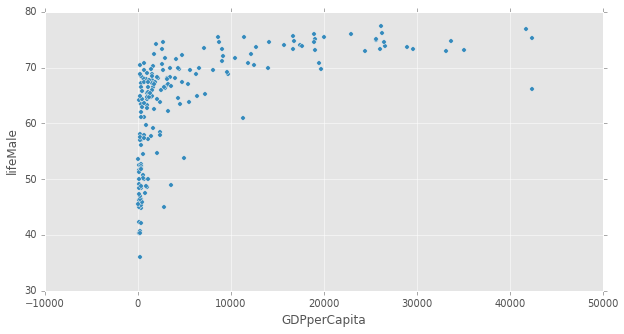

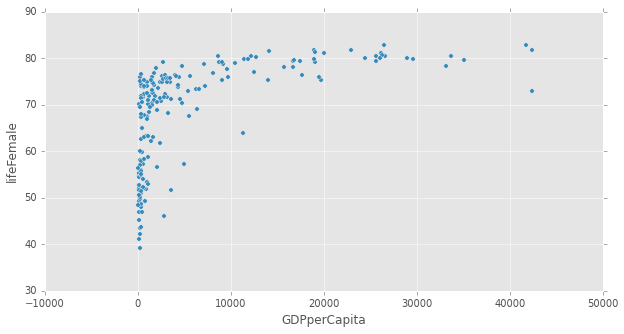

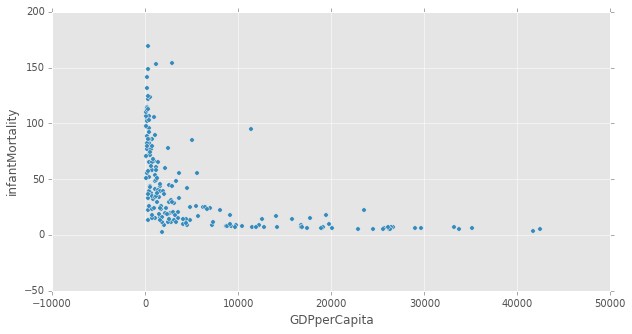

In [96]:
data.plot(kind='scatter', y='lifeMale', x='GDPperCapita', figsize=(10,5))
data.plot(kind='scatter', y='lifeFemale', x='GDPperCapita', figsize=(10,5))
data.plot(kind='scatter', y='infantMortality', x='GDPperCapita',figsize=(10,5))

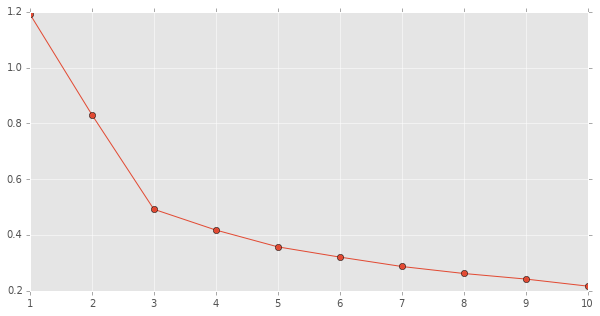

In [65]:
k_list = range(1, 11)
dist_list = []
sub_df = vq.whiten(data[['lifeMale', 'GDPperCapita']].dropna())
for k in k_list:
    centroids, dist = vq.kmeans(sub_df, k)
    dist_list.append(dist)

plt.figure(figsize=(10,5))
plt.plot(k_list, dist_list, linestyle='-', marker='o')

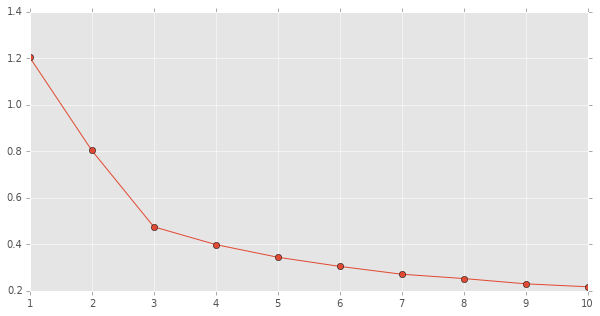

In [66]:
k_list = range(1, 11)
dist_list = []
sub_df = vq.whiten(data[['lifeFemale', 'GDPperCapita']].dropna())
for k in k_list:
    centroids, dist = vq.kmeans(sub_df, k)
    dist_list.append(dist)

plt.figure(figsize=(10,5))
plt.plot(k_list, dist_list, linestyle='-', marker='o')

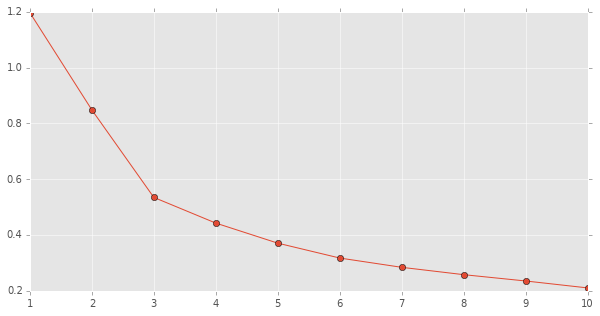

In [67]:
k_list = range(1, 11)
dist_list = []
sub_df = vq.whiten(data[['infantMortality', 'GDPperCapita']].dropna())
for k in k_list:
    centroids, dist = vq.kmeans(sub_df, k)
    dist_list.append(dist)

plt.figure(figsize=(10,5))
plt.plot(k_list, dist_list, linestyle='-', marker='o')

(0, 50000.0)

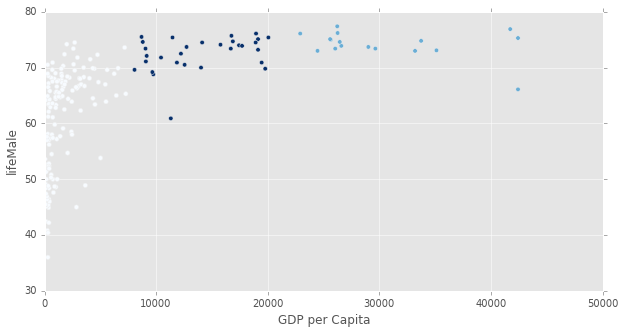

In [138]:
model = KMeans(3)
sub_df = data[['lifeMale', 'GDPperCapita']].dropna()
model.fit(sub_df)
y_pred = model.predict(sub_df)
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['GDPperCapita'], sub_df['lifeMale'], c=y_pred, cmap='Blues')
plt.ylabel('lifeMale')
plt.xlabel('GDP per Capita')
plt.xlim(0)

(0, 50000.0)

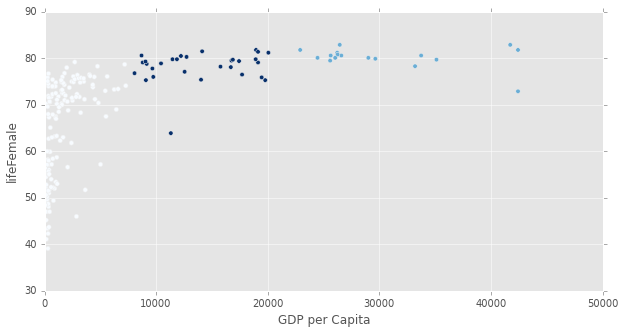

In [139]:
model = KMeans(3)
sub_df = data[['lifeFemale', 'GDPperCapita']].dropna()
model.fit(sub_df)
y_pred = model.predict(sub_df)
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['GDPperCapita'], sub_df['lifeFemale'], c=y_pred, cmap='Blues')
plt.ylabel('lifeFemale')
plt.xlabel('GDP per Capita')
plt.xlim(0)

(0, 50000.0)

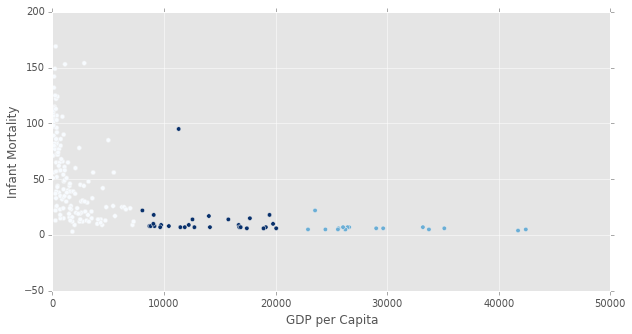

In [140]:
model = KMeans(3)
sub_df = data[['infantMortality', 'GDPperCapita']].dropna()
model.fit(sub_df)
y_pred = model.predict(sub_df)
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['GDPperCapita'], sub_df['infantMortality'], c=y_pred, cmap='Blues')
plt.ylabel('Infant Mortality')
plt.xlabel('GDP per Capita')
plt.xlim(0)